<a href="https://colab.research.google.com/github/yura123123/Deep_Learning/blob/main/Chornii_Yurii_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from random import *
import pandas as pd
import numpy as np


generate dataframe

In [3]:
def car_prop():
    car_prop = {"year": randint(1900, 2021),
                "horse_power": randint(55, 1001),
                "engine_cilinders": randint(1, 16),
                "odometr": randint(0,999999),
                "seats_number": randint(1, 45),
                "engine_size": uniform(1, 9),
                "miles_per_galon": uniform(18, 200),
                "fuel_type": randint(0, 5),
                "motor_type": randint(0, 2),
                "road_tax": randint(0, 600),
            }
    return car_prop
def get_price(car_prop):
    price = 0
    price += car_prop["year"] * 2
    price += car_prop["horse_power"] 
    price += car_prop["engine_cilinders"] * 100
    price += car_prop["odometr"] * 0.01
    price += car_prop["seats_number"]
    price += car_prop["engine_size"]
    price += car_prop["miles_per_galon"] * 10
    price += car_prop["fuel_type"] * 0.01
    price += car_prop["motor_type"] * 1000
    price += car_prop["road_tax"] 
    return round(price)


In [4]:
size = 150000
car_prop = pd.DataFrame(car_prop() for i in range(size))

In [5]:
car_prop["price"] = get_price(car_prop)

In [6]:
car_prop

,year,horse_power,engine_cilinders,odometr,seats_number,engine_size,miles_per_galon,fuel_type,motor_type,road_tax,price
0,1999,613,10,850815,3,7.520659,162.763833,2,2,114,17871.0
1,1988,850,7,6072,38,4.686340,76.494469,4,2,598,8992.0
2,1956,389,3,545261,19,3.875631,101.703606,2,2,525,13619.0
3,1903,943,16,550241,45,5.902342,170.245476,5,0,131,13736.0
4,1970,390,12,4752,40,1.716599,106.889922,1,0,133,6821.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,2009,578,5,89466,30,4.458461,190.395326,3,2,259,10188.0
149996,1980,868,3,173469,33,1.938266,131.368695,3,2,205,10416.0
149997,1901,355,8,975405,32,5.110498,51.914245,4,0,402,15669.0
149998,2011,309,15,347823,22,1.401788,103.353489,5,1,298,11664.0


In [7]:
# normalizing data
car_prop = (car_prop - car_prop.mean()) / car_prop.std()

In [8]:
car_prop.head(10)

,year,horse_power,engine_cilinders,odometr,seats_number,engine_size,miles_per_galon,fuel_type,motor_type,road_tax,price
0,1.088125,0.307086,0.326774,1.212774,-1.539445,1.095702,1.022619,-0.293449,1.221801,-1.068196,1.662115
1,0.776030,1.174317,-0.324551,-1.711931,1.157443,-0.132187,-0.618738,0.877879,1.221801,1.720640,-1.205810
2,-0.131883,-0.512575,-1.192983,0.154872,-0.306582,-0.483404,-0.139110,-0.293449,1.221801,1.300010,0.288715
3,-1.635615,1.514623,1.629423,0.172114,1.696821,0.394612,1.164965,1.463543,-1.227827,-0.970241,0.326506
4,0.265329,-0.508915,0.760990,-1.716501,1.311551,-1.418744,-0.040435,-0.879113,-1.227827,-0.958717,-1.907045
5,1.173242,0.343678,1.412315,1.002671,1.388605,-1.572357,0.264856,0.877879,-0.003013,-1.500350,1.167277
6,-0.103511,0.354656,0.543882,0.348349,0.849227,0.465728,1.506547,-1.464777,1.221801,-0.054074,1.013529
7,-0.273745,-1.376146,0.326774,-0.155383,-1.000067,0.616763,-0.823286,-0.293449,1.221801,-0.255746,-0.059803
8,1.031380,0.544935,-0.758767,1.515682,1.234497,0.061244,1.630182,-0.879113,-1.227827,-0.359463,1.310690
9,1.116497,0.848648,-0.324551,1.103893,0.155742,-1.006297,-1.336181,1.463543,1.221801,-0.659090,1.140145


Linier Regression

In [10]:
X = car_prop.drop(columns = "price", axis=1)
y = car_prop["price"]

In [11]:
from sklearn import metrics, linear_model
lm = linear_model.LinearRegression()
linear_regression_model = lm.fit(X, y)

In [12]:
# MSE
lin_reg_mse = metrics.mean_squared_error(y, linear_regression_model.predict(X))
lin_reg_mse

8.66276806474013e-09

In [13]:
pred = lm.predict(X)
print(y[0], pred[0])

1.662114674209501 1.662221052151198


split data 60%, 20%, 20%

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [15]:
batch_size = 1000
epochs = 50

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
def c_model(model, learning_rate, optimizer):
    opt = optimizer(learning_rate)
    model.compile(
        loss='mean_squared_error',
        optimizer=opt)
    return model
    

In [18]:
from matplotlib import pyplot as plt

def plot_curves(model, X_train, y_train, X_val, y_val):

    global batch_size
    global epochs
    global verbose

    history = model.fit(
        X_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        verbose=0,
        validation_data=(X_val, y_val),
    )

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    return history

In [19]:
def DNN(layers):
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(10,)))
    for i in range(layers):
        model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model


In [20]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

models = [DNN(1), DNN(5), DNN(25)]
model_names = []
optimizers = [Adam, SGD, RMSprop]
learning_rates = [0.1, 0.01, 0.001]

learning rate 0.1, Adam, DNN1


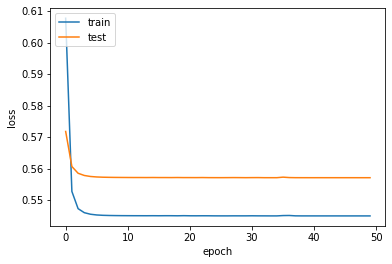

learning rate 0.01, Adam, DNN1


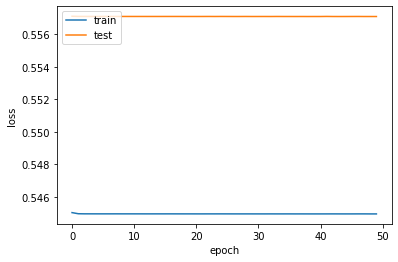

learning rate 0.001, Adam, DNN1


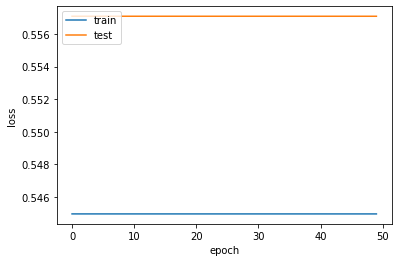

learning rate 0.1, SGD, DNN1


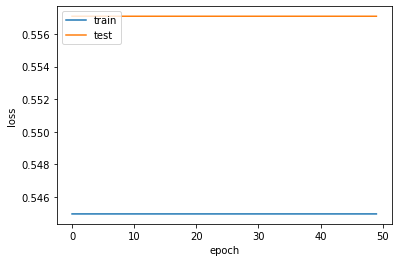

learning rate 0.01, SGD, DNN1


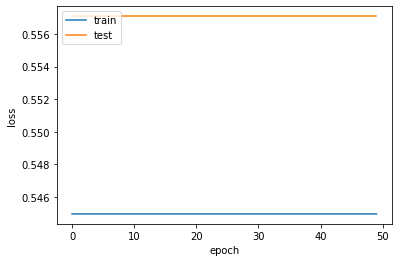

learning rate 0.001, SGD, DNN1


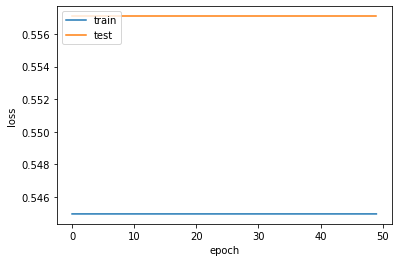

learning rate 0.1, RMSprop, DNN1


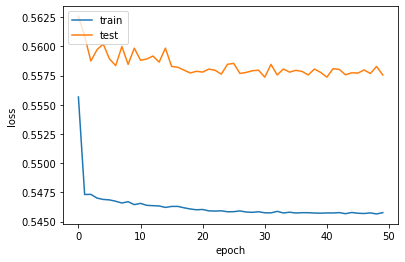

learning rate 0.01, RMSprop, DNN1


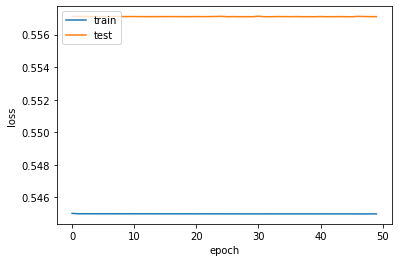

learning rate 0.001, RMSprop, DNN1


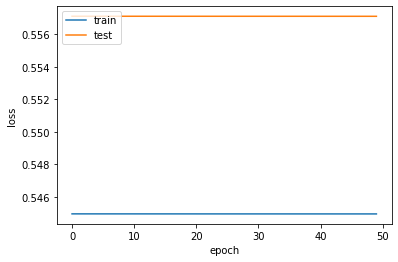

learning rate 0.1, Adam, DNN2


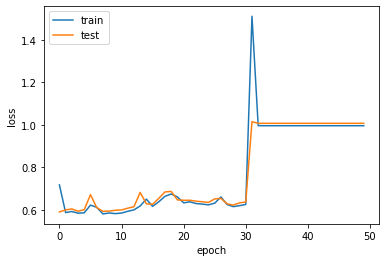

learning rate 0.01, Adam, DNN2


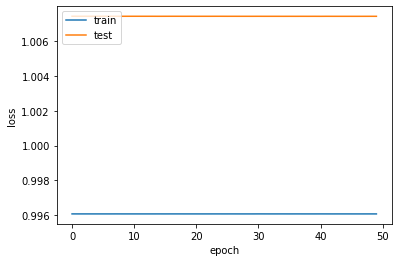

learning rate 0.001, Adam, DNN2


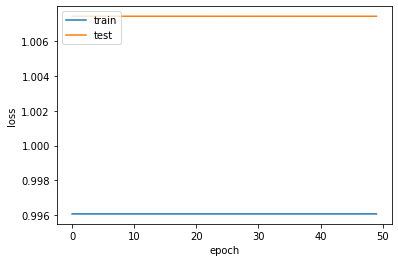

learning rate 0.1, SGD, DNN2


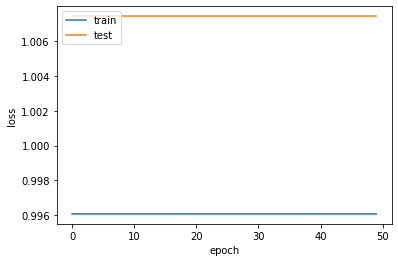

learning rate 0.01, SGD, DNN2


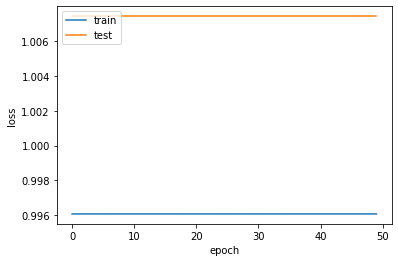

learning rate 0.001, SGD, DNN2


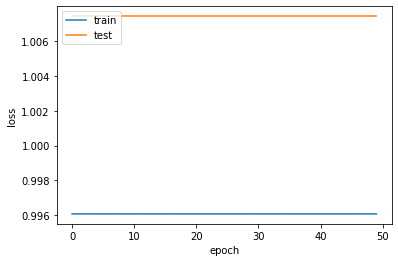

learning rate 0.1, RMSprop, DNN2


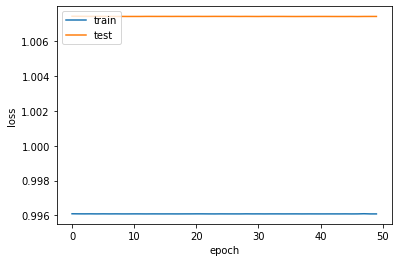

learning rate 0.01, RMSprop, DNN2


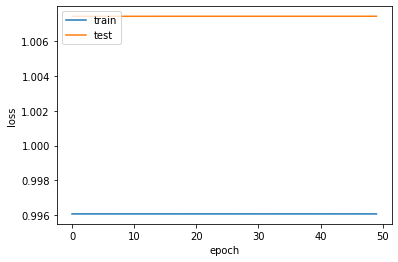

learning rate 0.001, RMSprop, DNN2


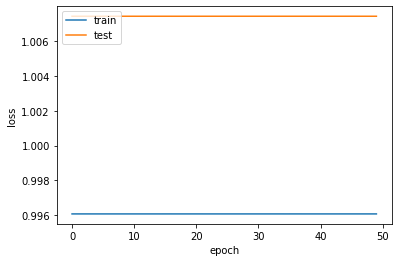

learning rate 0.1, Adam, DNN3


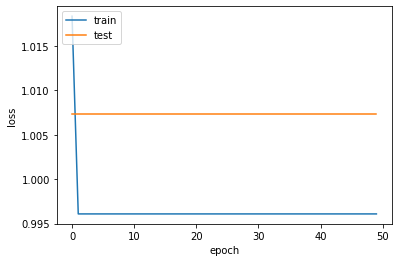

learning rate 0.01, Adam, DNN3


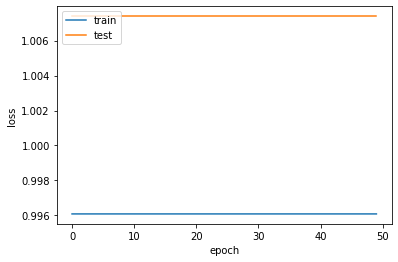

learning rate 0.001, Adam, DNN3


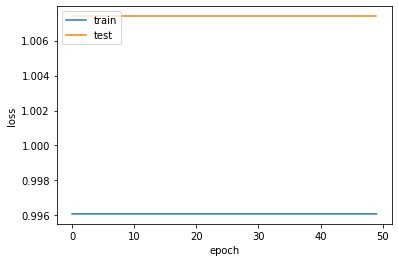

learning rate 0.1, SGD, DNN3


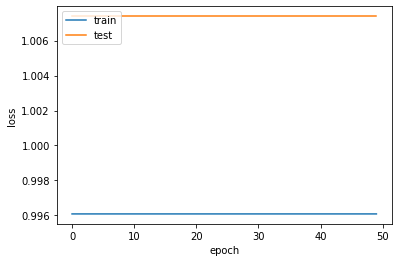

learning rate 0.01, SGD, DNN3


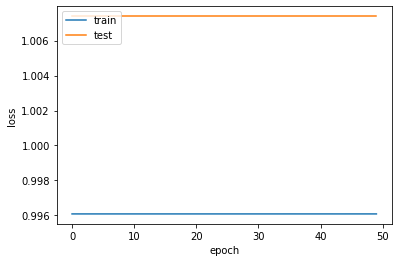

learning rate 0.001, SGD, DNN3


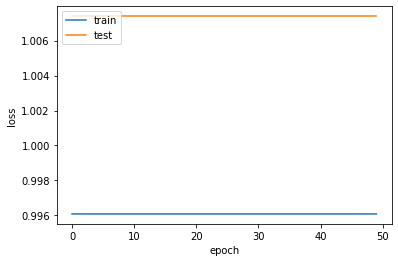

learning rate 0.1, RMSprop, DNN3


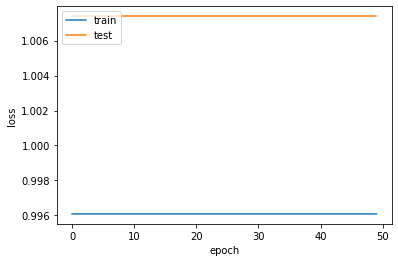

learning rate 0.01, RMSprop, DNN3


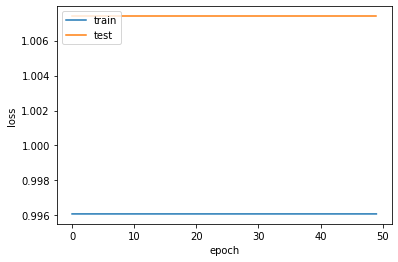

learning rate 0.001, RMSprop, DNN3


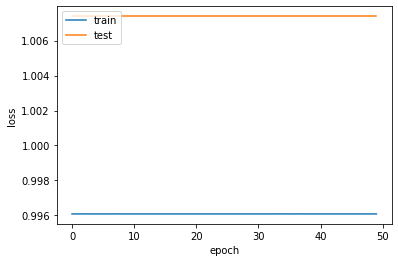

CPU times: user 4min 37s, sys: 15 s, total: 4min 52s
Wall time: 5min 5s


In [21]:
%%time

best_history = None
best_name = ""

for i, model in enumerate(models):
    for optimizer in optimizers:
        for learning_rate in learning_rates:
            print(f"learning rate {learning_rate}, {optimizer.__name__}, DNN{i+1}")
            m = c_model(model, learning_rate, optimizer)
            history = plot_curves(m, X_test, y_test, X_val, y_val)

            best_score = min(history.history['val_loss'])
            if best_history is None or best_score < min(best_history.history['val_loss']):
                best_history = history

Comparison to baseline

In [22]:
def comparison(history, name):

    global batch_size
    global epochs
    global verbose
    global lin_reg_mse

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.axhline(y=lin_reg_mse, color='r', linestyle='-')
    plt.title(name)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test', 'benchmark'], loc='upper left')
    plt.show()

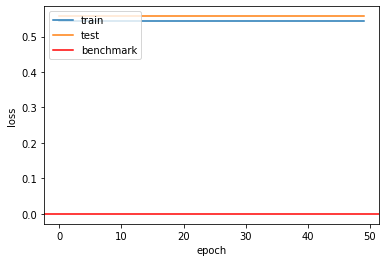

In [23]:
comparison(best_history, best_name)

## 13. Compare all DNN results


- RMSprop optimizer on higher learning rates results in steep "jumps" in the loss function, while other optimizers produce a smooth learning curve
- High learning rate produced overfitting with most combinations of optimizers and DNNs.
- All combinations are worse than the benchmark (linear regression)
- Most optimizer-learning step combinations produced overfitting 